## Iris Flower Classification


Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


Load the dataset

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


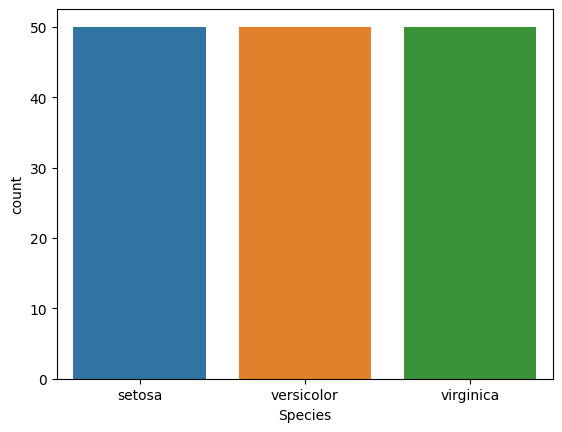

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df['Species'] = iris.target_names[iris.target]

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df['Species']

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check for null values
df.isnull().sum()

# Count species
print(Y.value_counts())

# Plot class distribution
sns.countplot(x=df['Species'], hue=df['Species'])
plt.show()

Feature Visualization

<Figure size 800x600 with 0 Axes>

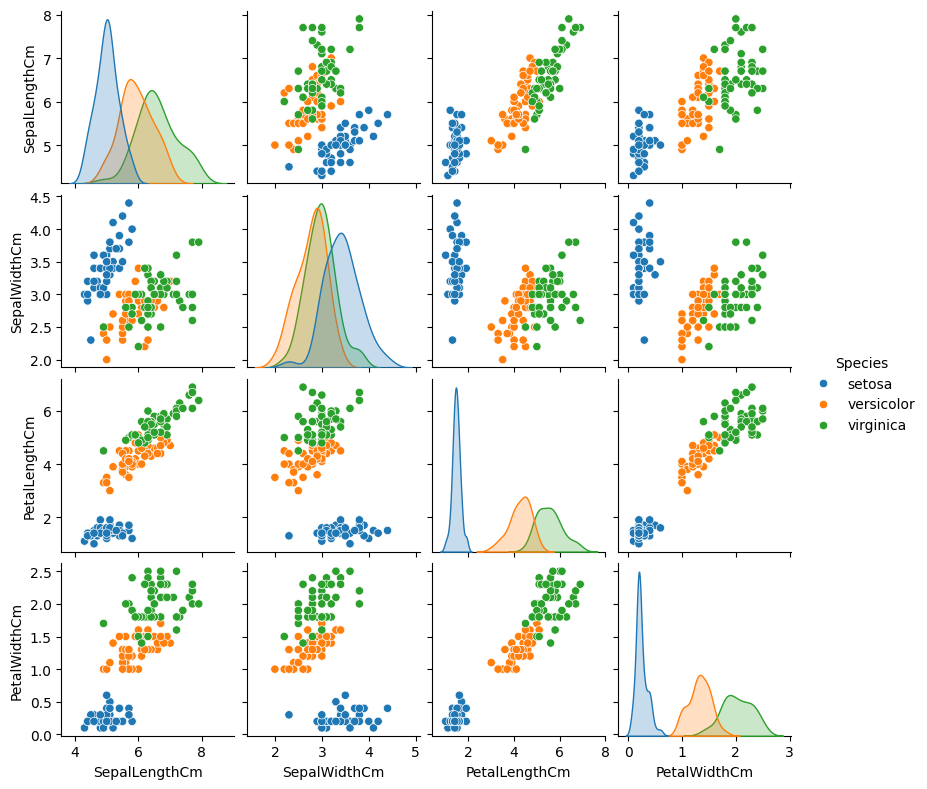

In [ ]:
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue='Species', height=2)
plt.show()

Training and Testing

In [ ]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, Y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(Y_test, y_pred_svm)

In [ ]:
# k-Nearest Neighbors (k-NN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, Y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(Y_test, y_pred_knn)

In [ ]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(Y_test, y_pred_dt)

In [ ]:
# Print accuracies
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(f"k-NN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

SVM Accuracy: 96.67%
k-NN Accuracy: 100.00%
Decision Tree Accuracy: 100.00%


Accuracy of different Models

/tmp/ipython-input-3283494470.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


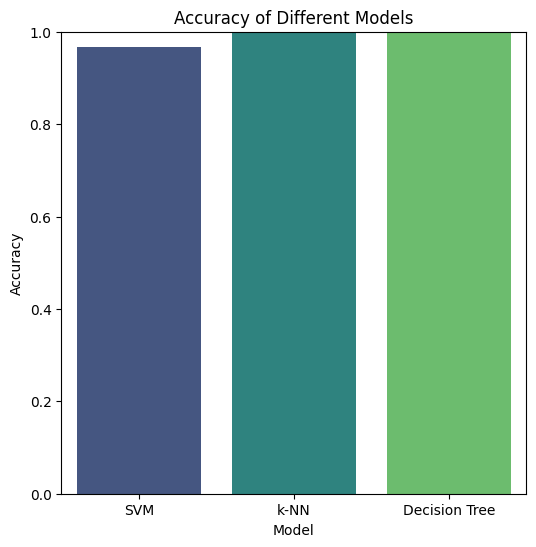

In [ ]:
# Create a DataFrame with model names and accuracy values
results_df = pd.DataFrame({
    'Model': ['SVM', 'k-NN', 'Decision Tree'],
    'Accuracy': [accuracy_svm, accuracy_knn, accuracy_dt]
})

# Plot the bar graph
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to the range of 0 to 1 (accuracy range)
plt.show()

<Axes: >

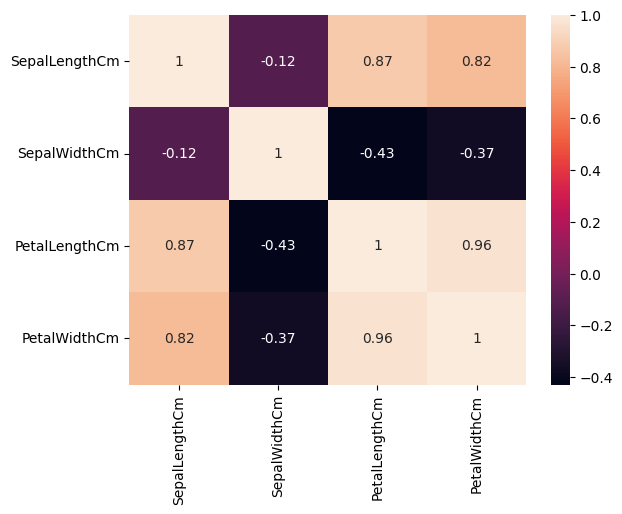

In [ ]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_